#Multi-dimensional Numpy arrays - Numpy part 2
Multi-dimensional Numpy arrays offer an opportunity to represent multiple vectors together.

In [1]:
import numpy as np

climate_data = np.array([[73, 67, 43],
                        [91, 88, 64],
                        [87, 134, 58],
                        [102, 43, 37],
                        [69, 96, 70]])

In [2]:
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

Here is vizual representations of a 2-d array as a  matrix with 5 rows (one for each regions for the climate data) and 3 columns (containing values for temperature, rainfall and humidity).

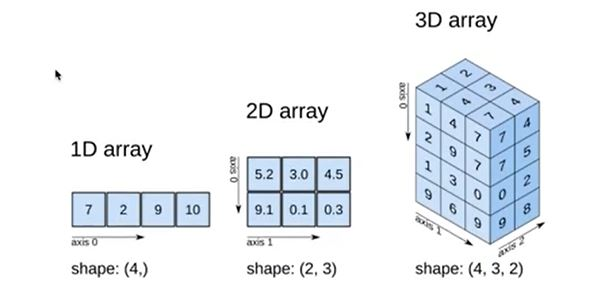

In [3]:
# 2D array (matrix)
climate_data.shape

(5, 3)

In [5]:
weights = np.array([0.3, 0.2, 0.5])

In [6]:
weights

array([0.3, 0.2, 0.5])

In [8]:
# 1D array
weights.shape

(3,)

In [11]:
# 3D array
arr3 = np.array([
    [[11, 12, 13],
     [13, 14, 15]],
    [[15, 16, 17],
     [17, 18, 19.5]]])

In [12]:
arr3.shape

(2, 2, 3)

All the elements in a numpy array have the same dataype. You can check the data type of an array using the .dtype property.

In [13]:
weights.dtype

dtype('float64')

If an array contains even a single floating number, all the other elements are also coverted to floats.

In [15]:
climate_data.dtype

dtype('int64')

In [16]:
arr3.dtype

dtype('float64')

We can compute teh prediction yields of apples in all the regions, using a single matrix multiplication between climate_data (a 5x3 matrix) and weights (a vector of length 3).
Here is what it looks like visually.

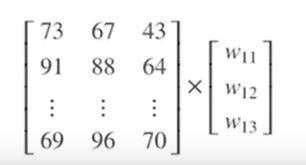

In Numpy we can use the np.matmul function, or the @ operator to perform matrix multiplication.

In [18]:
np.matmul(climate_data, weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [19]:
climate_data @ weights

array([56.8, 76.9, 81.9, 57.7, 74.9])

##Working with CSV data files¶

Numpy also provides helper functions reading from & writing to files. Let's download a file climate.txt, which contains 10,000 climate measurements (temperature, rainfall & humidity) in the following format:



```
temperature,rainfall,humidity
25.00,76.00,99.00
39.00,65.00,70.00
59.00,45.00,77.00
84.00,63.00,38.00
66.00,50.00,52.00
41.00,94.00,77.00
91.00,57.00,96.00
49.00,96.00,99.00
67.00,20.00,28.00
...
```
This format of storing data is known as comma-separated values or CSV.

 CSVs: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)

To read this file into a numpy array, we can use the genfromtxt function.


In [20]:
import urllib.request

In [21]:
urllib.request.urlretrieve(
    'https://gist.githubusercontent.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv',
    'climate.txt'
)

('climate.txt', <http.client.HTTPMessage at 0x7879dd2e1270>)

In [22]:
climate_data = np.genfromtxt('climate.txt', delimiter = ',', skip_header = 1)

In [23]:
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [25]:
climate_data.shape

(10000, 3)

We can use a matrix multiplication operator @ to predict the yield of apples for the entire dataset using a given set of weights.

In [26]:
weights = np.array([0.3, 0.2, 0.5])

In [27]:
yields = climate_data @ weights

In [28]:
yields

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

In [30]:
yields.shape

(10000,)

We can now add the yields back to climate_data as a fourths column using the np.concatenate function.

In [35]:
climate_results = np.concatenate((climate_data, yields.reshape(10000, 1)), axis = 1)

In [36]:
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])



There are a couple of subtleties here:

  Since we wish to add new columns, we pass the argument axis=1 to np.concatenate. The axis argument specifies the dimension for concatenation.

  The arrays should have the same number of dimensions, and the same length along each except the dimension used for concatenation. We use the np.reshape function to change the shape of yields from (10000,) to (10000,1).

Here's a visual explanation of np.concatenate along axis=1 (can you guess what axis=0 results in?):

The best way to understand what a Numpy function does is to experiment with it and read the documentation to learn about its arguments & return values.

Let's write the final results from our computation above back to a file using the np.savetxt function.



In [38]:
np.savetxt('climate_results.txt',
           climate_results,
           fmt='%.2f',
           header = "temperature, rainfall, humidity, yield_apples",
           comments = '')



Numpy provides hundreds of functions for performing operations on arrays. Here are some commonly used functions:

    Mathematics: np.sum, np.exp, np.round, arithemtic operators
    Array manipulation: np.reshape, np.stack, np.concatenate, np.split
    Linear Algebra: np.matmul, np.dot, np.transpose, np.eigvals
    Statistics: np.mean, np.median, np.std, np.max

    How to find the function you need? The easiest way to find the right function for a specific operation or use-case is to do a web search. For instance, searching for "How to join numpy arrays" leads to this tutorial on array concatenation.

You can find a full list of array functions here: https://numpy.org/doc/stable/reference/routines.html
